# HW05: Predictive Models

## Setup

Run the following cell if you need to install the PyTorch or Transformers libraries on a lab computer:

In [ ]:
!pip install diffusers transformers accelerate safetensors torchvision --upgrade
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124 --upgrade

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu124


This code imports the libraries we need to run our inference pipelines:

In [ ]:
from PIL import Image
from transformers import pipeline
from transformers import DetrImageProcessor, DetrForObjectDetection

## Depth [Prediction](https://huggingface.co/depth-anything/Depth-Anything-V2-Base-hf)

In [ ]:
depth_estimator = pipeline(
  task="depth-estimation",
  model="depth-anything/Depth-Anything-V2-Base-hf"
)

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/390M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


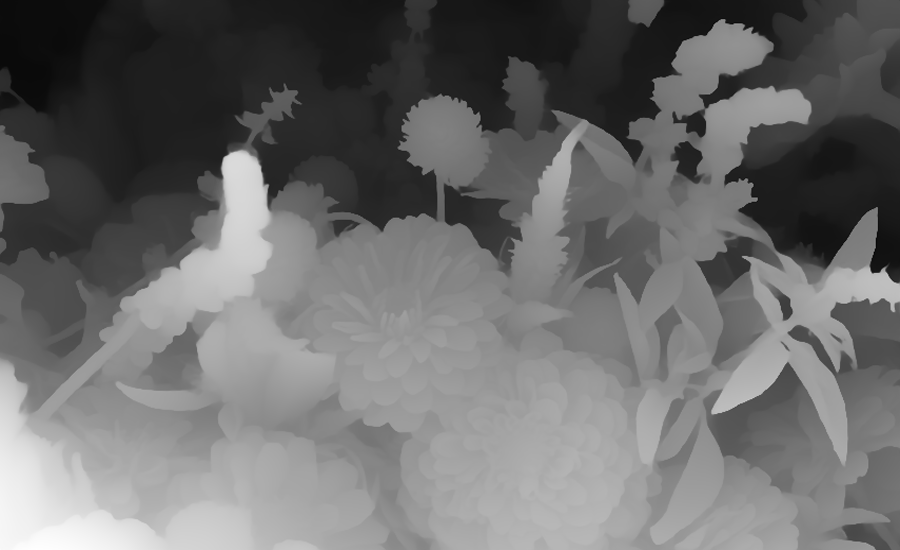

In [ ]:
image = Image.open("./imgs/flowers.jpg")
result = depth_estimator(image)
display(result["depth"])

## Object [Detection](https://huggingface.co/facebook/detr-resnet-101)

Some models don't work with the pipeline inference object, but the Transformers library still has some consistent-ish interfaces for running these models.

In [ ]:
OBJ_MODEL = "facebook/detr-resnet-101"
detr_processor = DetrImageProcessor.from_pretrained(OBJ_MODEL)
detr_model = DetrForObjectDetection.from_pretrained(OBJ_MODEL)

preprocessor_config.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.38k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/243M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/179M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-101 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
image = Image.open("./imgs/people.jpg")
iw, ih = image.size

detr_inputs = detr_processor(images=image, return_tensors="pt")

detr_output = detr_model(**detr_inputs)
detr_results = detr_processor.post_process_object_detection(detr_output, 0.99, [(ih, iw)])

display(detr_results)

[{'scores': tensor([0.9995, 0.9942, 0.9951, 0.9993, 0.9944, 0.9977],
         grad_fn=<IndexBackward0>),
  'labels': tensor([ 1,  1, 77,  1,  1, 64]),
  'boxes': tensor([[413.6277,  45.5431, 525.1335, 396.0908],
          [551.3812, 133.6239, 565.6740, 184.6238],
          [462.7809, 139.5751, 475.0023, 151.8354],
          [307.1216,  50.7288, 401.6793, 394.2442],
          [572.8370, 134.4498, 589.9800, 179.6407],
          [ 57.6269, 161.1983, 136.7103, 257.9586]], grad_fn=<IndexBackward0>)}]

In [ ]:
# Turn label ids into labels
for label_id in detr_results[0]["labels"]:
  print(detr_model.config.id2label[int(label_id)])

person
person
cell phone
person
person
potted plant
